# Adam Optimizer
Adam (Adaptive Moment Estimation) adalah algoritma optimasi yang menggabungkan ide-ide dari dua algoritma optimasi populer lainnya, yaitu RMSprop dan Momentum. Optimizer ini mempertahankan dua rata-rata yang bergerak untuk setiap parameter, yaitu momen pertama (medium) dan momen kedua (uncentered variance). Hal ini menyesuaikan tingkat pembelajaran dari setiap parameter secara individual, memberikan optimasi yang efisien dan efektif untuk berbagai tugas pembelajaran mesin. Berikut merupakan rumus dari Adam Optimizer :    

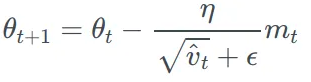

Dimana :

θt meru

# **TUGAS 2 PEMODELAN DAN PEMBELAJARAN MESIN**
**KELOMPOK 4:**
1. Rifqy Audzan Rusli - 2106733686
2. Althaira Anjani - 20006482344
3. Rafa Ahmad Nadhir Ar-rayyan - 2106651181
4. Faiz Wafi Athallah Zain - 2106733673
5. Azzam Muhammad Rizqun Karima - 2006579623
6. Cressia Nauli Agustin - 2006483492


# Binary Cross-Entropy Loss
Binary Cross-Entropy (biasa disebut sebagai log loss atau logistic loss) adalah fungsi kerugian yang umum digunakan untuk masalah klasifikasi biner. Ini mengukur perbedaan antara probabilitas yang diprediksi dan label biner yang benar. Binary Cross-Entropy Loss memiliki rumus sebagai berikut :

L(y, y^)=−(y⋅log( y^ )+(1−y)⋅log(1− y^))

dimana :

y merupakan true label (bernilai 0 atau 1)

dan y^ merupakan probabilitas dari class positive yang diprediksi

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id = '1KUoB7_UHDvvA93cvb434rwB9sGvEL79w'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)
df = df.head(5000)

NameError: name 'pd' is not defined

Memasukkan dataset ke dalam .ipynb dan membatasinya menjadi 5000 baris dari data

In [ ]:
df = df.dropna()

yesno_convert = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for column in yesno_convert:
    df[column] = df[column].replace({'Yes': 1, 'No': 0})

df["Diabetic"] = df["Diabetic"].replace({'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1, 'Yes':1})
df["GenHealth"] = df["GenHealth"].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4})

X = df.drop(columns=["HeartDisease", "Sex", "AgeCategory", "Race"])
y = df["HeartDisease"]

print("X (input):")
print(X)
print("\ny (output):")
print(y)


X (input):
        BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0     16.60        1                0       0             3.0          30.0   
1     20.34        0                0       1             0.0           0.0   
2     26.58        1                0       0            20.0          30.0   
3     24.21        0                0       0             0.0           0.0   
4     23.71        0                0       0            28.0           0.0   
...     ...      ...              ...     ...             ...           ...   
4995  28.12        1                0       0             0.0           0.0   
4996  31.89        1                1       0             0.0           2.0   
4997  27.26        1                0       0             0.0           0.0   
4998  28.34        0                0       0             0.0           0.0   
4999  18.79        0                0       0             0.0           0.0   

      DiffWalking  Diabetic  PhysicalAct

Pre processing dari dataset agar bisa diolah. Mendefinisikan input(X) yaitu 13 neuraon dan output(Y) 1 neuron.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype('float32')
X_test = scaler.transform(X_test).astype('float32')

# Ensure consistent shapes for single features
X_train = X_train.reshape(-1, 1) if len(X_train.shape) == 1 else X_train
X_test = X_test.reshape(-1, 1) if len(X_test.shape) == 1 else X_test
# Build a shallow neural network
model_shallow = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_shallow.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
shallow_train = model_shallow.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate the model on the test set
y_pred_shallow_probs = model_shallow.predict(X_test)
y_pred_shallow = (y_pred_shallow_probs >= 0.5).astype(int)

accuracy_shallow = accuracy_score(y_test, y_pred_shallow)
classification_rep = classification_report(y_test, y_pred_shallow)
conf_matrix = confusion_matrix(y_test, y_pred_shallow)

print(f"Shallow Neural Network Accuracy: {accuracy_shallow}")



Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.8644 - val_loss: 0.3226 - val_accuracy: 0.8938
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8900 - val_loss: 0.2796 - val_accuracy: 0.8975
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8900 - val_loss: 0.2719 - val_accuracy: 0.8975
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.8916 - val_loss: 0.2689 - val_accuracy: 0.8975
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.2926 - accuracy: 0.8900 - val_loss: 0.2673 - val_accuracy: 0.9000
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8922 - val_loss: 0.2661 - val_accuracy: 0.8988
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.8916 - val_loss: 0.2654 - val_accuracy: 0.9038
Epoch 

Kode ini mendefinisikan jaringan saraf shallow menggunakan model Sequential dari libary Keras. Ini terdiri dari satu lapisan tersembunyi dengan 32 neuron dan fungsi aktivasi ReLU. Lapisan output memiliki satu neuron dengan aktivasi sigmoid, sesuai untuk klasifikasi biner. Kemudian akan mengompilasi model, menentukan optimizer ('adam'), fungsi kerugian ('binary_crossentropy' untuk klasifikasi biner), dan metrik yang akan dipantau selama pelatihan (akurasi). Model dilatih pada data pelatihan (X_train, y_train) selama 10 epoch dengan ukuran batch 32. validation_split=0.2 menunjukkan bahwa 20% dari data pelatihan akan digunakan untuk validasi.Baris-baris ini membuat prediksi pada data pengujian. Probabilitas prediksi diperoleh menggunakan predict, dan kemudian diterapkan ambang batas 0.5 untuk mengubahnya menjadi prediksi biner.Akurasi dihitung menggunakan fungsi accuracy_score, dan metrik tambahan seperti presisi, recall, dan F1-score dihitung menggunakan classification_report. Matriks kebingungan dibuat menggunakan confusion_matrix.

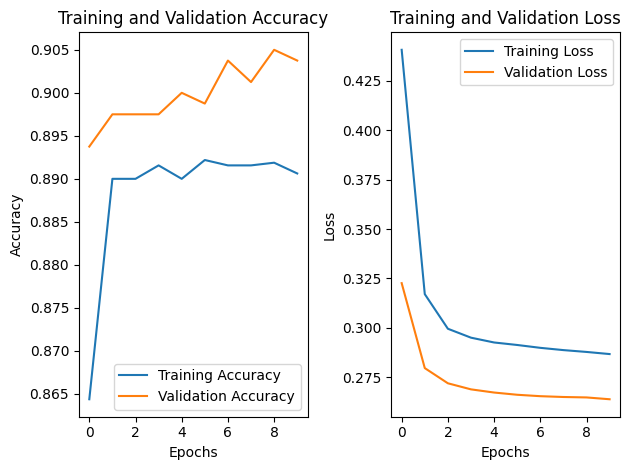

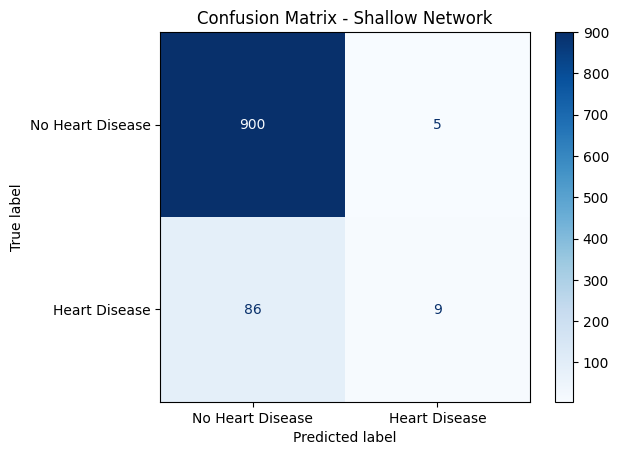

In [ ]:
# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(shallow_train.history['accuracy'], label='Training Accuracy')
plt.plot(shallow_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(shallow_train.history['loss'], label='Training Loss')
plt.plot(shallow_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi confusion matrix
cm_shallow = confusion_matrix(y_test, y_pred_shallow)
disp_shallow = ConfusionMatrixDisplay(confusion_matrix=cm_shallow, display_labels=["No Heart Disease", "Heart Disease"])
disp_shallow.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Shallow Network')
plt.show()

# **EVALUASI KINERJA DATASET MENGGUNAKAN METODE DEEP NEURAL NETWORK**

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset dari Google Drive
file_id = '1KUoB7_UHDvvA93cvb434rwB9sGvEL79w'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)

In [ ]:
# Pisahkan fitur (features) dan label (target)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Handle kolom-kolom dengan nilai string
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [ ]:
# Pisahkan dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Bangun model neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Konversi label menjadi bentuk biner
y_train_binary = y_train.map({'No': 0, 'Yes': 1})
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

# Latih model
history = model.fit(X_train, y_train_binary, epochs=10, batch_size=32, validation_data=(X_test, y_test_binary))

Epoch 1/10
7995/7995 [==============================] - 27s 3ms/step - loss: 0.2318 - accuracy: 0.9156 - val_loss: 0.2337 - val_accuracy: 0.9138
Epoch 2/10
7995/7995 [==============================] - 24s 3ms/step - loss: 0.2274 - accuracy: 0.9161 - val_loss: 0.2331 - val_accuracy: 0.9137
Epoch 3/10
7995/7995 [==============================] - 27s 3ms/step - loss: 0.2262 - accuracy: 0.9161 - val_loss: 0.2320 - val_accuracy: 0.9138
Epoch 4/10
7995/7995 [==============================] - 25s 3ms/step - loss: 0.2256 - accuracy: 0.9162 - val_loss: 0.2341 - val_accuracy: 0.9136
Epoch 5/10
7995/7995 [==============================] - 25s 3ms/step - loss: 0.2252 - accuracy: 0.9162 - val_loss: 0.2317 - val_accuracy: 0.9132
Epoch 6/10
7995/7995 [==============================] - 25s 3ms/step - loss: 0.2248 - accuracy: 0.9165 - val_loss: 0.2330 - val_accuracy: 0.9136
Epoch 7/10
7995/7995 [==============================] - 26s 3ms/step - loss: 0.2245 - accuracy: 0.9165 - val_loss: 0.2323 - val_ac

In [ ]:
# Evaluasi model pada data pengujian
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Metrik kinerja
accuracy = accuracy_score(y_test_binary, y_pred_classes)
classification_rep = classification_report(y_test_binary, y_pred_classes)
conf_matrix = confusion_matrix(y_test_binary, y_pred_classes)

1999/1999 [==============================] - 4s 2ms/step


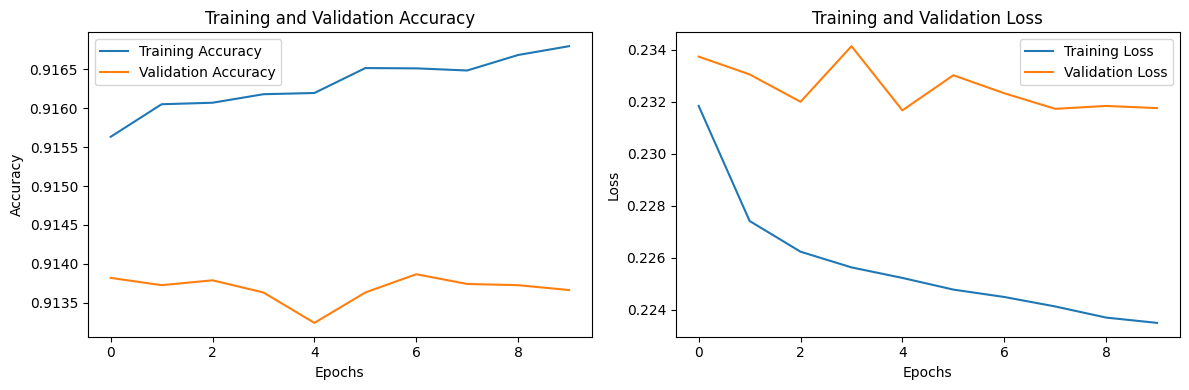

In [ ]:
# Visualisasi akurasi dan loss selama pelatihan
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

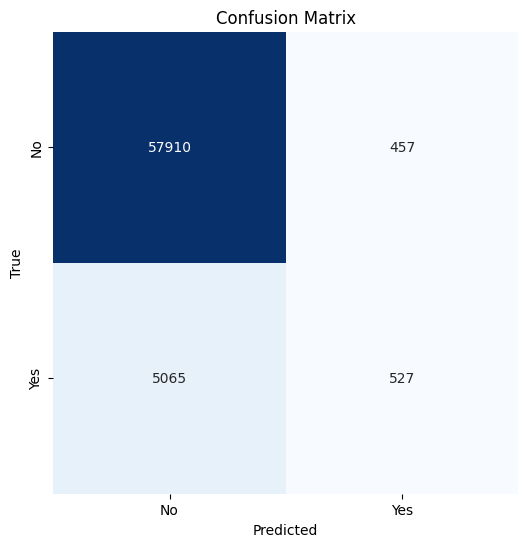

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()